In [1]:
import os
print(os.getcwd())


C:\Users\PraveenKumar\RetinaNet


In [2]:
# !git clone https://github.com/fizyr/keras-retinanet.git

In [3]:
%cd keras-retinanet/
# !pip install .


C:\Users\PraveenKumar\RetinaNet\keras-retinanet


In [4]:
# !python setup.py build_ext --inplace


In [21]:
import numpy as np
import shutil
import pandas as pd
import os, sys, random
import xml.etree.ElementTree as ET
import pandas as pd
from os import listdir
from os.path import isfile, join
import matplotlib.pyplot as plt
from PIL import Image
import requests
import urllib
from keras_retinanet.utils.visualization import draw_box, draw_caption , label_color
from keras_retinanet.utils.image import preprocess_image, resize_image


In [22]:
os.getcwd()

'C:\\Users\\PraveenKumar\\RetinaNet\\keras-retinanet'

In [23]:
pngPath='C:/Users/PraveenKumar/RetinaNet//sampleImage/'
annotPath='C:/Users/PraveenKumar/RetinaNet//sampleImageCords/'

In [24]:
data=pd.DataFrame(columns=['fileName','xmin','ymin','xmax','ymax','class'])

In [25]:
allfiles = [f for f in listdir(annotPath) if isfile(join(annotPath, f))] 

In [26]:
#Read all pdf files in images and then in text and store that in temp folder
for file in allfiles:
    #print(file)
    if (file.split(".")[1]=='xml'):
        fileName='C:/Users/PraveenKumar/RetinaNet/sampleImage/'+file.replace(".xml",'.jpg')
        tree = ET.parse(annotPath+file)
        root = tree.getroot()
        for obj in root.iter('object'):
            cls_name = obj.find('name').text
            #print(file)
            xml_box = obj.find('bndbox')
            xmin = xml_box.find('xmin').text
            ymin = xml_box.find('ymin').text
            xmax = xml_box.find('xmax').text
            ymax = xml_box.find('ymax').text
            # Append rows in Empty Dataframe by adding dictionaries
            data = data.append({'fileName': fileName, 'xmin': xmin, 'ymin':ymin,'xmax':xmax,'ymax':ymax,'class':cls_name}, ignore_index=True)

                
data.shape 

(2, 6)

In [27]:
data

,fileName,xmin,ymin,xmax,ymax,class
0,C:/Users/PraveenKumar/RetinaNet/sampleImage/sa...,2446,423,3252,1499,Dog
1,C:/Users/PraveenKumar/RetinaNet/sampleImage/sa...,1661,526,2408,1876,Dog


['2446', '423', '3252', '1499']
['1661', '526', '2408', '1876']


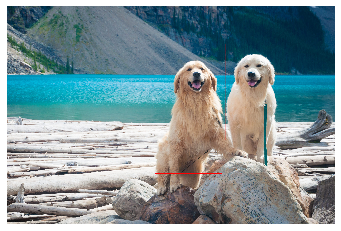

In [28]:
def show_image_with_boxes(df):
  # pick a random image
  filepath = df.sample()['fileName'].values[0]

  # get all rows for this image
  df2 = df[df['fileName'] == filepath]
  im = np.array(Image.open(filepath))

  # if there's a PNG it will have alpha channel
  im = im[:,:,:3]

  for idx, row in df2.iterrows():
    box = [
      row['xmin'],
      row['ymin'],
      row['xmax'],
      row['ymax'],
    ]
    print(box)
    draw_box(im, box, color=(255, 0, 0))

  plt.axis('off')
  plt.imshow(im)
  plt.show()                  
                  
                  
show_image_with_boxes(data)                  
      


In [21]:
# data['xmin']=data['xmin'].astype(int)
# data['ymin']=data['ymin'].astype(int)
# data['xmax']=data['xmax'].astype(int)
# data['ymax']=data['ymax'].astype(int)

In [22]:
os.getcwd()

'C:\\Users\\PraveenKumar\\RetinaNet\\keras-retinanet'

In [23]:
data.head()

,fileName,xmin,ymin,xmax,ymax,class
0,C:/Users/PraveenKumar/RetinaNet/maskDetectorJP...,116,23,758,637,noMask
1,C:/Users/PraveenKumar/RetinaNet/maskDetectorJP...,102,1,302,215,noMask
2,C:/Users/PraveenKumar/RetinaNet/maskDetectorJP...,307,2,499,204,noMask
3,C:/Users/PraveenKumar/RetinaNet/maskDetectorJP...,352,211,665,508,noMask
4,C:/Users/PraveenKumar/RetinaNet/maskDetectorJP...,394,61,487,152,mask


In [24]:

classes = ['mask','noMask']
with open('../maskDetectorClasses.csv', 'w') as f:
  for i, class_name in enumerate(classes):
    f.write(f'{class_name},{i}\n')
            
if not os.path.exists('snapshots'):
  os.mkdir('snapshots')                  
PRETRAINED_MODEL = 'snapshots/resnet50_csv_02.h5'

In [25]:
# URL_MODEL = 'https://github.com/fizyr/keras-retinanet/releases/download/0.5.1/resnet50_coco_best_v2.1.0.h5'
# urllib.request.urlretrieve(URL_MODEL, PRETRAINED_MODEL)

print('Downloaded pretrained model to ' + PRETRAINED_MODEL)          


Downloaded pretrained model to snapshots/resnet50_csv_02.h5


In [26]:
os.getcwd()

'C:\\Users\\PraveenKumar\\RetinaNet\\keras-retinanet'

In [17]:
# !keras_retinanet/bin/train.py --freeze-backbone \
#     --random-transform \
#     --weights {PRETRAINED_MODEL} \
#     --batch-size 8 \
#     --steps 500 \
#     --epochs 2 \
#     csv maskDetectorData.csv maskDetectorClasses.csv

In [27]:
from glob import glob
model_paths = glob('snapshots/resnet50_csv_0*.h5')
latest_path = sorted(model_paths)[-1]
print("path:", latest_path)


path: snapshots\resnet50_csv_02.h5


In [28]:
from keras_retinanet import models

model = models.load_model(latest_path, backbone_name='resnet50')
model = models.convert_model(model)

label_map = {}
for line in open('../maskDetectorClasses.csv'):
  row = line.rstrip().split(',')
  label_map[int(row[1])] = row[0]

Using TensorFlow backend.


tracking <tf.Variable 'Variable:0' shape=(9, 4) dtype=float32, numpy=
array([[-22.627417, -11.313708,  22.627417,  11.313708],
       [-28.50876 , -14.25438 ,  28.50876 ,  14.25438 ],
       [-35.918785, -17.959393,  35.918785,  17.959393],
       [-16.      , -16.      ,  16.      ,  16.      ],
       [-20.158737, -20.158737,  20.158737,  20.158737],
       [-25.398417, -25.398417,  25.398417,  25.398417],
       [-11.313708, -22.627417,  11.313708,  22.627417],
       [-14.25438 , -28.50876 ,  14.25438 ,  28.50876 ],
       [-17.959393, -35.918785,  17.959393,  35.918785]], dtype=float32)> anchors
tracking <tf.Variable 'Variable:0' shape=(9, 4) dtype=float32, numpy=
array([[-45.254833, -22.627417,  45.254833,  22.627417],
       [-57.01752 , -28.50876 ,  57.01752 ,  28.50876 ],
       [-71.83757 , -35.918785,  71.83757 ,  35.918785],
       [-32.      , -32.      ,  32.      ,  32.      ],
       [-40.317474, -40.317474,  40.317474,  40.317474],
       [-50.796833, -50.796833,  50.7

In [29]:
label_map

{0: 'mask', 1: 'noMask'}

In [30]:
def show_image_with_predictions(df, threshold=0.6):
  # choose a random image
  row = df.sample()
  filepath = row['fileName'].values[0]
  print("filepath:", filepath)

  # get all rows for this image
  df2 = df[df['fileName'] == filepath]
  im = np.array(Image.open(filepath))
  print("im.shape:", im.shape)

  # if there's a PNG it will have alpha channel
  im = im[:,:,:3]

  # plot true boxes
  for idx, row in df2.iterrows():
    box = [
      row['xmin'],
      row['ymin'],
      row['xmax'],
      row['ymax'],
    ]
    print(box)
    draw_box(im, box, color=(255, 0, 0))
  
  ### plot predictions ###

  # get predictions
  imp = preprocess_image(im)
  imp, scale = resize_image(im)

  boxes, scores, labels = model.predict_on_batch(
    np.expand_dims(imp, axis=0)
  )

  # standardize box coordinates
  boxes /= scale

  # loop through each prediction for the input image
  for box, score, label in zip(boxes[0], scores[0], labels[0]):
    # scores are sorted so we can quit as soon
    # as we see a score below threshold
    if score < threshold:
      break

    box = box.astype(np.int32)
    color = label_color(label)
    draw_box(im, box, color=color)

    class_name = label_map[label]
    caption = f"{class_name} {score:.3f}"
    draw_caption(im, box, caption)
    score, label=score, label
  plt.axis('off')
  plt.imshow(im)
  plt.show()
  return score, label


In [31]:
plt.rcParams['figure.figsize'] = [20, 10]

In [32]:
data.head()

,fileName,xmin,ymin,xmax,ymax,class
0,C:/Users/PraveenKumar/RetinaNet/maskDetectorJP...,116,23,758,637,noMask
1,C:/Users/PraveenKumar/RetinaNet/maskDetectorJP...,102,1,302,215,noMask
2,C:/Users/PraveenKumar/RetinaNet/maskDetectorJP...,307,2,499,204,noMask
3,C:/Users/PraveenKumar/RetinaNet/maskDetectorJP...,352,211,665,508,noMask
4,C:/Users/PraveenKumar/RetinaNet/maskDetectorJP...,394,61,487,152,mask


filepath: C:/Users/PraveenKumar/RetinaNet/maskDetectorJPEGImages/205.jpg
im.shape: (607, 910, 3)
['25', '97', '660', '603']


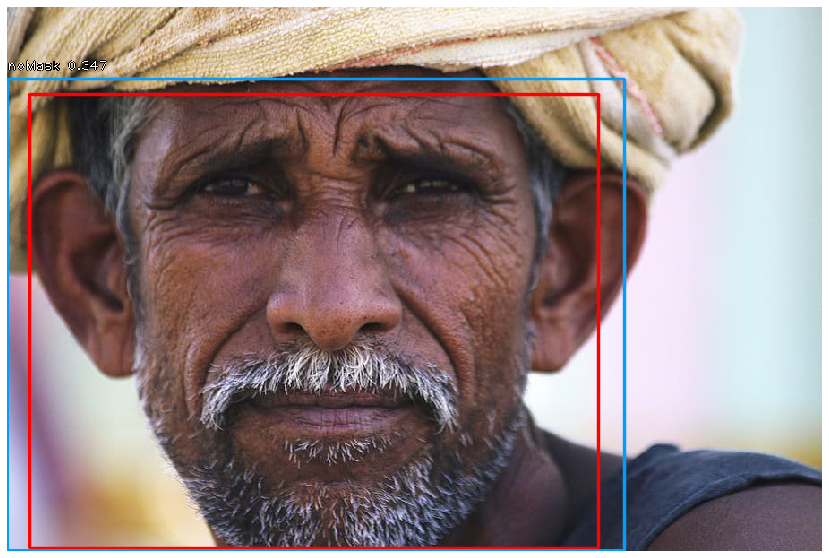

In [49]:
score, label=show_image_with_predictions(data, threshold=0.3)